<a href="https://colab.research.google.com/github/DashadaM/Netflix-dataset-analysis/blob/main/Netflix_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix TV Shows and Movies**

There is a dataset with information about all shows available on Netflix streaming and information about the cast. It's been uploaded on kaggle.com by Victor Soeiro.  
https://drive.google.com/file/d/1eHodRouckOit0G6JezrYpuEpMU2hsUDL/view?usp=sharing  

**Dataset Structure:**  

***id:*** The title ID on JustWatch.  
***title:*** The name of the title.  
***show_type:*** TV show or movie.  
***description:*** A brief description.  
***release_year:*** The release year.  
***age_certification:*** The age certification.  
***runtime:*** The length of the episode (SHOW) or movie.  
***genres:*** A list of genres.  
***production_countries:*** A list of countries that produced the title.  
***seasons:*** Number of seasons if it's a SHOW.  
***imdb_id:*** The title ID on IMDB.  
***imdb_score:*** Score on IMDB.  
***imdb_votes:*** Votes on IMDB.  
***tmdb_popularity:*** Popularity on TMDB.  
***tmdb_score:*** Score on TMDB.  




We will analyze dataset using Python and 2 libraries.  
Upload the data.

In [50]:
! gdown --id 1eHodRouckOit0G6JezrYpuEpMU2hsUDL

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1eHodRouckOit0G6JezrYpuEpMU2hsUDL
To: /content/titles.csv
100% 2.03M/2.03M [00:00<00:00, 175MB/s]


In [51]:
import pandas as pd
import numpy as np

In [52]:
df = pd.read_csv('/content/titles.csv')

Let's take a quick look at data.

In [53]:
df.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


The dataset contains data that is not necesary for analysis. So we will delete some columns.

In [54]:
df.drop(['id', 'imdb_id', 'imdb_votes', 'description', 'production_countries', 'tmdb_popularity'],axis=1,inplace=True)

Next we will check if there any dublicates or null values in data.

In [55]:
df.duplicated().mean()

0.0

In [56]:
df.isna().mean()

title                0.000171
type                 0.000000
release_year         0.000000
age_certification    0.447692
runtime              0.000000
genres               0.000000
seasons              0.640000
imdb_score           0.082393
tmdb_score           0.053162
dtype: float64

We will fill in blanks where type is srtring with 'no_info' value.



In [57]:
df['title'].fillna('no_info',inplace=True)
df['age_certification'].fillna('no_info',inplace=True)

Now we are ready to process data.  


In [47]:
df['type'].value_counts()

MOVIE    3744
SHOW     2106
Name: type, dtype: int64

Here we see that there are one and a half times more movies than shows on Netflix.

Next we look at the table with the average rating of movies and shows.

In [48]:
df.groupby('type')[['imdb_score', 'tmdb_score']].agg('mean')

,imdb_score,tmdb_score
type,,
MOVIE,6.246748,6.464012
SHOW,6.977927,7.480413


There are 2 scores in the dataset: IMDb and TMDB.  
IMDb is the world's most popular and authoritative source for movie, TV and celebrity content.  
The Movie Database (TMDb) is a popular, user editable database for movies and TV shows.  
Registered users can cast a vote (from 1 to 10) on every released title in the database.  
We can see that in both cases the shows on average score higher than the movies in our comparison.


Now let's take a look at the TOP 10 pieces of cinematography in both scores.

In [11]:
(df.sort_values(['imdb_score'], ascending=False)[['title','imdb_score','type']].head(10)
.style.set_table_styles([dict(selector='th', props = [('text-align', 'left')])])
.set_properties(**{'text-align': 'left'}))

,title,imdb_score,type
2658,#ABtalks,9.600000,SHOW
216,Breaking Bad,9.500000,SHOW
564,Khawatir,9.500000,SHOW
3147,Our Planet,9.300000,SHOW
233,Avatar: The Last Airbender,9.300000,SHOW
1258,Reply 1988,9.200000,SHOW
3068,The Last Dance,9.100000,SHOW
1092,Chhota Bheem & Krishna vs Zimbara,9.100000,MOVIE
4771,Major,9.100000,MOVIE
3500,Kota Factory,9.100000,SHOW


In [12]:
(df.sort_values(['tmdb_score'], ascending=False)[['title','tmdb_score','type']].head(10)
.style.set_table_styles([dict(selector='th', props = [('text-align', 'left')])])
.set_properties(**{'text-align': 'left'}))

,title,tmdb_score,type
5849,Mighty Little Bheem: Kite Festival,10.000000,SHOW
5334,Selling Tampa,10.000000,SHOW
4175,Lugar de Mulher,10.000000,SHOW
4202,A Queen Is Born,10.000000,SHOW
4265,Secreto bien guardado,10.000000,SHOW
4273,Legend Quest: Masters of Myth,10.000000,SHOW
4289,True: Friendship Day,10.000000,MOVIE
4296,Singapore Social,10.000000,SHOW
4320,Happy Jail,10.000000,SHOW
4327,Buddi,10.000000,SHOW


Here we see that the highst TMDd score is 10.0 meanwhile the highst IMDd score is 9.6. And the whole list of TOP 10 contains only 10.0 TMDb scored shows.

We will see which films have higher scores, old or new ones.
Firstly we will find the oldest year of release and the newest. To divide the years into time periods.

In [13]:
movie_table = df.loc[df['type']=='MOVIE']
min_year = movie_table['release_year'].min()
print(min_year)
max_year = movie_table['release_year'].max()
print(max_year)

1954
2022


In [14]:
movie_groups = pd.cut(df['release_year'],[1954,1965,1975,1985,1995,2005,2015,2022])
df.loc[df['type']=='MOVIE', 'movie_group'] = movie_groups

In [15]:
df.groupby('movie_group')['imdb_score'].agg('mean').sort_values(ascending=False)

movie_group
(1965, 1975]    7.145455
(1954, 1965]    7.050000
(1985, 1995]    6.730556
(1995, 2005]    6.730556
(1975, 1985]    6.665517
(2005, 2015]    6.508580
(2015, 2022]    6.127258
Name: imdb_score, dtype: float64

We can see that older films are rated higher. It can be hypothesized that this is due to the fact that older films are mostly watched by a more loyal audience.

Netflix started making original content in 2013. So we will analyse how much content has been released in time periods.

In [16]:
year_groups = pd.cut(df['release_year'],[2013,2016,2018,2020,2022])
df.loc[df['release_year'] > 2013, 'year_group'] = year_groups

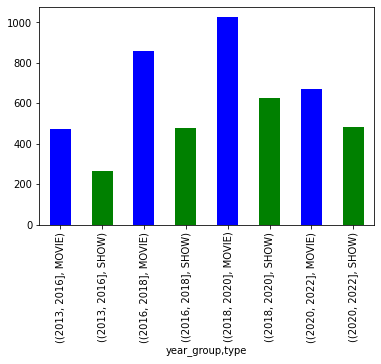

In [17]:
df.groupby(['year_group','type'])['type'].agg('count').plot(kind='bar', color=['blue','green'])

The chart shows that film production was the most active from 2018 to 2020, , and after that it went into decline. This is probably due to the onset of the pandemic.

We will explore which shows have higher average ratings (multi-episode or short-episode shows). Firstly we should take the segment that contains the bulk of the data.

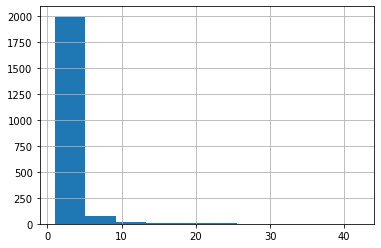

In [18]:
df['seasons'].hist(bins=10)

We can see that the main number of shows consits of a maximum 10 seasons.

In [19]:
df.loc[(df['seasons'] < 11.0)].groupby(['seasons'])['imdb_score'].agg('mean').sort_values(ascending=False)

seasons
9.0     8.222222
7.0     7.577778
6.0     7.448571
5.0     7.412658
3.0     7.227072
8.0     7.200000
4.0     6.987288
10.0    6.950000
2.0     6.939189
1.0     6.871679
Name: imdb_score, dtype: float64

In [20]:
df.loc[(df['seasons'] < 11.0)].groupby(['seasons'])['tmdb_score'].agg('mean').sort_values(ascending=False)

seasons
10.0    8.233333
9.0     8.022333
6.0     7.758917
5.0     7.757133
4.0     7.700458
8.0     7.599727
3.0     7.576984
2.0     7.537053
7.0     7.436556
1.0     7.389547
Name: tmdb_score, dtype: float64

In both cases it is clear that shows with more seasons have higher scores. Perhaps this is because viewers become more passionate with the series over time and give them higher scores.

Now let's see if there is a correlation between the movie runtime and its score.

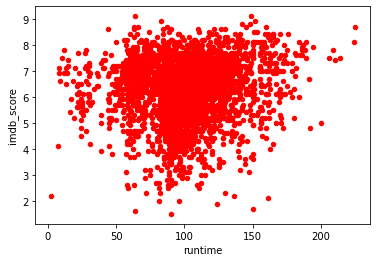

In [21]:
df_1=df.loc[df['type']=='MOVIE']
df_1.plot(x='runtime', y='imdb_score', kind = 'scatter', color= 'red')

It can be concluded that there is no correlation.

Let's make a chart to see how the movie runtime has changed over the years.

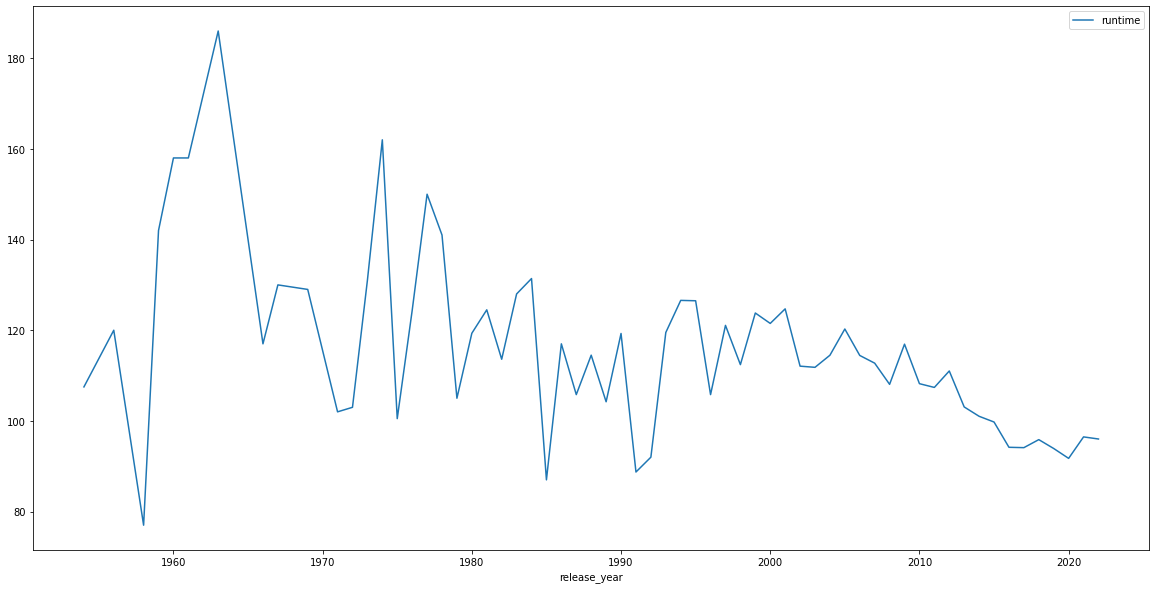

In [23]:
df.loc[df['type']=='MOVIE'].groupby('release_year')[['runtime']].agg('mean').plot(figsize=(20, 10))

We can see that, over time, there is a tendency for the average movie runtime to go down. This is possibly because viewers are becoming less diligent due to Instagram stories and Tik-Tok era.

Before starting analysis we should parse the genre column as it contains multiple genres that count as distinct value. Then we will see the most frequent genre and the most popular with viewers.

In [64]:
import math

genres = {}

for index, row in df.iterrows():
  score = row['imdb_score']
  if math.isnan(score): # skip all that doesn't have IMDB score
    continue 
  for string in row['genres'][1:-1].split(','):
    genre = string.strip()[1:-1]
    if genre == '':
      continue
    if genre not in genres.keys():
      genres[genre] = [0, 0]
      continue
    genres[genre][0] += 1
    genres[genre][1] += score

genre_counts = []
average_scores = []

for key in genres.keys():
  genre_counts.append((key, genres[key][0]))
  average_scores.append((key, genres[key][1] / genres[key][0]))

genre_counts.sort(key=lambda y: y[1], reverse=True)
average_scores.sort(key=lambda y: y[1], reverse=True)

print(genre_counts)
average_scores

[('drama', 2826), ('comedy', 2217), ('thriller', 1179), ('action', 1108), ('romance', 954), ('crime', 908), ('documentation', 858), ('family', 651), ('animation', 629), ('fantasy', 618), ('scifi', 559), ('european', 427), ('horror', 365), ('history', 253), ('music', 243), ('reality', 218), ('sport', 169), ('war', 154), ('western', 38)]


[('history', 7.127272727272719),
 ('war', 7.061688311688312),
 ('documentation', 7.007925407925406),
 ('animation', 6.702384737678855),
 ('sport', 6.652662721893491),
 ('crime', 6.64867841409692),
 ('drama', 6.624062278839361),
 ('fantasy', 6.555501618122977),
 ('scifi', 6.544543828264757),
 ('european', 6.526932084309143),
 ('music', 6.513580246913581),
 ('western', 6.463157894736843),
 ('action', 6.419765342960291),
 ('reality', 6.405963302752292),
 ('comedy', 6.393504736129894),
 ('romance', 6.379454926624733),
 ('thriller', 6.36743002544529),
 ('family', 6.332565284178189),
 ('horror', 6.002465753424657)]

Here we can see that drama is the most frequent genre but is not the most popular. The most highly rated genre is history.

The last data that we will look at is age_certification column.

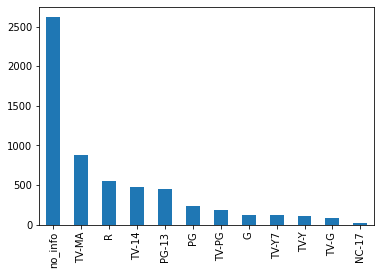

In [72]:
df['age_certification'].value_counts().plot(kind='bar')

Here we see that TV-MA age certification which means that it is designed only for adults and not suitable for children under 17 is the most frequent.

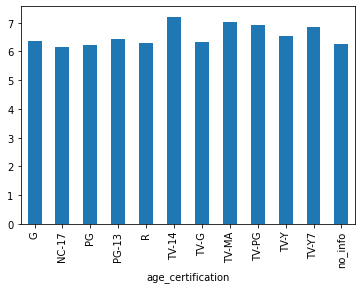

In [76]:
df.groupby('age_certification')['imdb_score'].agg('mean').plot(kind='bar')

TV-MA is also higly rated one but TV-14 is more popular age certification.

**Conclusion**  
We analysed the dataset, found some patterns and visualised them.